In [1]:
# Setup plotting
import matplotlib.pyplot as plt

import os
os.listdir('/kaggle/input/')

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

/tmp/ipykernel_18/3529637584.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
import pandas as pd

red_wine = pd.read_csv("/kaggle/input/red-wine-quality/red-wine.csv")
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
red_wine.shape # (rows, columns)

(1599, 12)

# 1) Input shape

In [4]:
input_shape =[11]

# 2) Define a linear model

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model=keras.Sequential([layers.Dense(units=1, input_shape=[11])])


2024-05-12 01:19:56.282346: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-12 01:19:56.282466: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-12 01:19:56.421238: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 3) Look at the weights

In [6]:
w, b = model.weights

In [7]:
print("Weights\n{}\n\nBias\n{}".format(w, b))

Weights
<KerasVariable shape=(11, 1), dtype=float32, path=sequential/dense/kernel>

Bias
<KerasVariable shape=(1,), dtype=float32, path=sequential/dense/bias>


In [8]:
w, b = model.get_weights()
print("Weights\n{}\n\nBias\n{}".format(w, b))

Weights
[[ 0.49375063]
 [ 0.636236  ]
 [ 0.15035063]
 [ 0.16518426]
 [-0.50569236]
 [-0.09893197]
 [ 0.47153646]
 [ 0.55953056]
 [-0.59698313]
 [-0.69805765]
 [-0.5527428 ]]

Bias
[0.]


# Optional: Plot the output of an untrained linear model

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


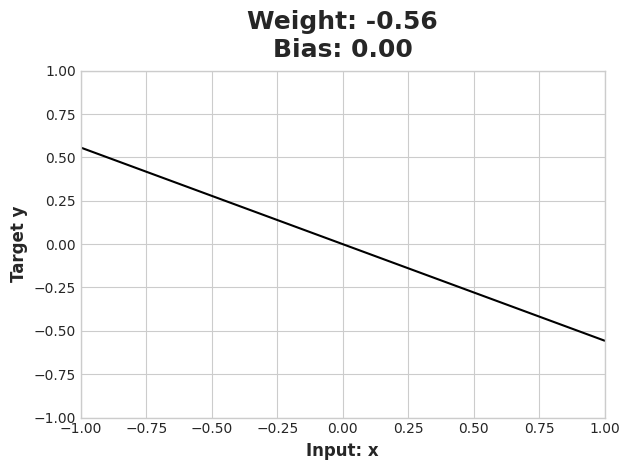

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt

model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()